# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
api_key = "955fd6c3cd625ea0fcbe70c62c805ff7"

url = "http://api.openweathermap.org/data/2.5/weather?q={city}&appid=" + api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid=" + api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["coord"]["lon"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | samana
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | kieta
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | dong hoi
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | inhambane
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | barbar
City not found. Skipping...
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | tromso
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | dhidhdhoo
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | kapaa


Processing Record 34 of Set 4 | ponta do sol
Processing Record 35 of Set 4 | jagalur
Processing Record 36 of Set 4 | cap malheureux
Processing Record 37 of Set 4 | chopinzinho
Processing Record 38 of Set 4 | malwan
City not found. Skipping...
Processing Record 39 of Set 4 | sinnamary
Processing Record 40 of Set 4 | sawtell
Processing Record 41 of Set 4 | tidore
City not found. Skipping...
Processing Record 42 of Set 4 | porto novo
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | raga
Processing Record 45 of Set 4 | kagalnitskaya
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | mana
Processing Record 48 of Set 4 | wanning
Processing Record 49 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 0 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 1 of Set 5 | hearst
Processing Record 2 of Set 5 | liverpool
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | mamakan
Processing Record 5 of Se

City not found. Skipping...
Processing Record 20 of Set 8 | kholtoson
Processing Record 21 of Set 8 | kholodnyy
Processing Record 22 of Set 8 | ahipara
Processing Record 23 of Set 8 | amderma
City not found. Skipping...
Processing Record 24 of Set 8 | meybod
Processing Record 25 of Set 8 | mookane
Processing Record 26 of Set 8 | zaranj
Processing Record 27 of Set 8 | emden
Processing Record 28 of Set 8 | sile
Processing Record 29 of Set 8 | zambezi
Processing Record 30 of Set 8 | ardakan
Processing Record 31 of Set 8 | toliary
City not found. Skipping...
Processing Record 32 of Set 8 | medvezhyegorsk
Processing Record 33 of Set 8 | lancut
Processing Record 34 of Set 8 | knysna
Processing Record 35 of Set 8 | asyut
Processing Record 36 of Set 8 | suslovo
Processing Record 37 of Set 8 | vanavara
Processing Record 38 of Set 8 | xining
Processing Record 39 of Set 8 | aguimes
Processing Record 40 of Set 8 | halifax
Processing Record 41 of Set 8 | aasiaat
Processing Record 42 of Set 8 | la f

Processing Record 7 of Set 12 | harper
Processing Record 8 of Set 12 | shingu
Processing Record 9 of Set 12 | waipawa
Processing Record 10 of Set 12 | montemor-o-novo
Processing Record 11 of Set 12 | nivala
Processing Record 12 of Set 12 | le port
Processing Record 13 of Set 12 | hambantota
Processing Record 14 of Set 12 | berlevag
Processing Record 15 of Set 12 | veraval
Processing Record 16 of Set 12 | sao filipe
Processing Record 17 of Set 12 | mombetsu
Processing Record 18 of Set 12 | hailar
Processing Record 19 of Set 12 | tessalit
Processing Record 20 of Set 12 | jimo
Processing Record 21 of Set 12 | sibi
Processing Record 22 of Set 12 | agadir
Processing Record 23 of Set 12 | sharjah
Processing Record 24 of Set 12 | naantali
Processing Record 25 of Set 12 | chake chake
Processing Record 26 of Set 12 | reconquista
Processing Record 27 of Set 12 | zyryanka
Processing Record 28 of Set 12 | torzhok
Processing Record 29 of Set 12 | saint anthony
Processing Record 30 of Set 12 | atar


In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,-134.9692,71,25,7.89,PF,1674591646
1,samana,19.2056,-69.3369,-69.3369,70,40,4.12,DO,1674591646
2,punta arenas,-53.1500,-70.9167,-70.9167,46,75,11.83,CL,1674591647
3,kieta,-6.2167,155.6333,155.6333,85,100,2.67,PG,1674591647
4,bluff,-46.6000,168.3333,168.3333,79,78,2.00,NZ,1674591647
...,...,...,...,...,...,...,...,...,...
548,ponca city,36.7070,-97.0856,-97.0856,92,100,2.06,US,1674592011
549,deputatskiy,69.3000,139.9000,139.9000,99,40,1.86,RU,1674592011
550,methuen,42.7262,-71.1909,-71.1909,78,75,7.20,US,1674591562
551,padang,-0.9492,100.3543,100.3543,76,100,1.88,ID,1674592012


In [28]:
# Display sample data
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,-134.9692,71,25,7.89,PF,1674591646
1,samana,19.2056,-69.3369,-69.3369,70,40,4.12,DO,1674591646
2,punta arenas,-53.1500,-70.9167,-70.9167,46,75,11.83,CL,1674591647
3,kieta,-6.2167,155.6333,155.6333,85,100,2.67,PG,1674591647
4,bluff,-46.6000,168.3333,168.3333,79,78,2.00,NZ,1674591647


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_file.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data_file.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,-134.9692,71,25,7.89,PF,1674591646
1,samana,19.2056,-69.3369,-69.3369,70,40,4.12,DO,1674591646
2,punta arenas,-53.1500,-70.9167,-70.9167,46,75,11.83,CL,1674591647
3,kieta,-6.2167,155.6333,155.6333,85,100,2.67,PG,1674591647
4,bluff,-46.6000,168.3333,168.3333,79,78,2.00,NZ,1674591647


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

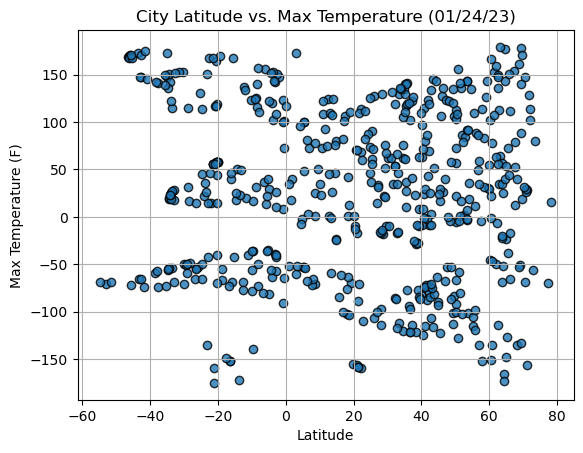

In [31]:
# Build scatter plot for latitude vs. temperature
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
           city_data_df["Max Temp"],
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

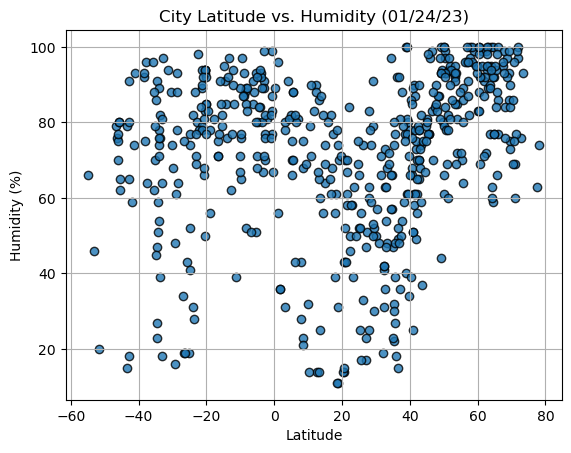

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

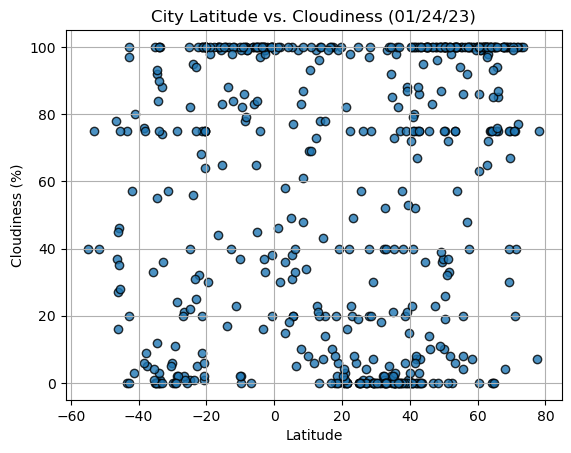

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

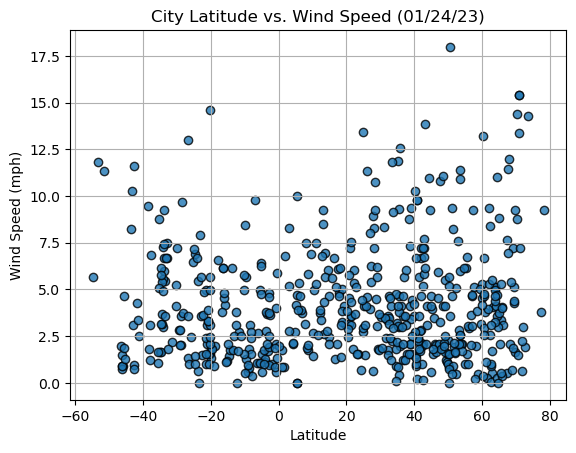

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
           city_data_df["Wind Speed"],
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
#scipy.stats.linregress


###  Temperature vs. Latitude Linear Regression Plot

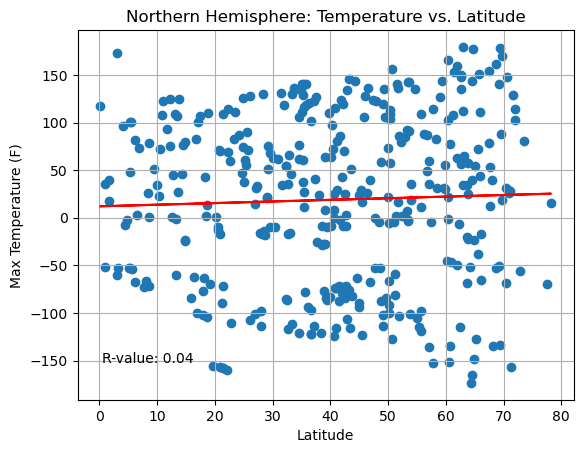

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filter the northern hemisphere data
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Create a DataFrame from the northern hemisphere data
northern_hemisphere_df = pd.DataFrame(northern_hemisphere)

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Fit a linear model to the data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Temperature vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.10), xycoords='axes fraction')

# Show the plot
plt.show()

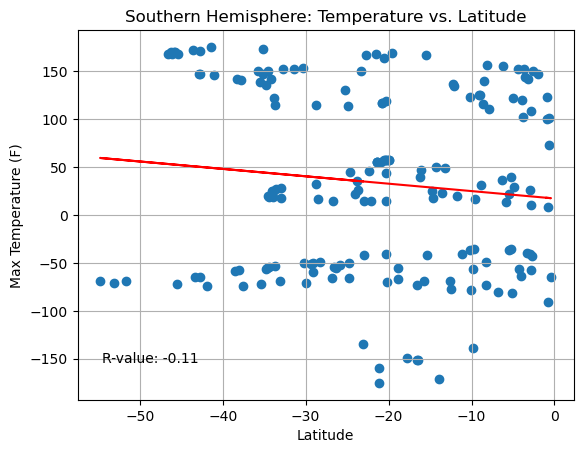

In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Filter the northern hemisphere data
southern_hemisphere = [city for city in city_data if city["Lat"] <= 0]

# Create a DataFrame from the northern hemisphere data
southern_hemisphere_df = pd.DataFrame(southern_hemisphere)

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Fit a linear model to the data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.10), xycoords='axes fraction')


# Show the plot
plt.show()

**Discussion about the linear relationship:** The correlation direction is different: The correlation coefficient is positive in the southern hemisphere and negative in the northern hemisphere, indicating a different relationship between temperature and latitude in the two hemispheres. In the southern hemisphere, temperature tends to increase as latitude increases, but in the northern hemisphere, temperature tends to decrease as latitude increases. This difference could be caused by ocean currents, atmospheric circulation patterns, and the amount of solar radiation received.

### Humidity vs. Latitude Linear Regression Plot

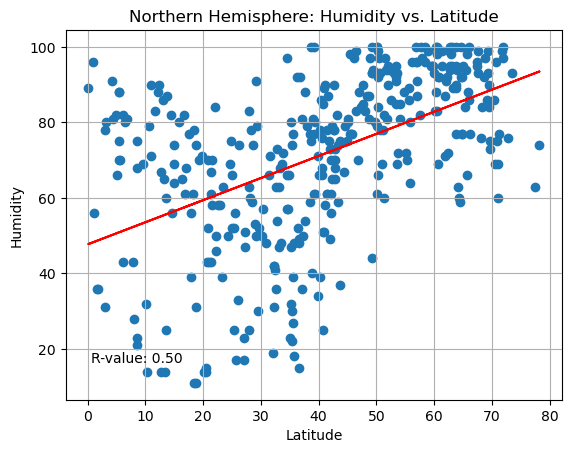

In [70]:
# Linear regression on Northern Hemisphere
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])
linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.10), xycoords='axes fraction')


#Display
plt.show()

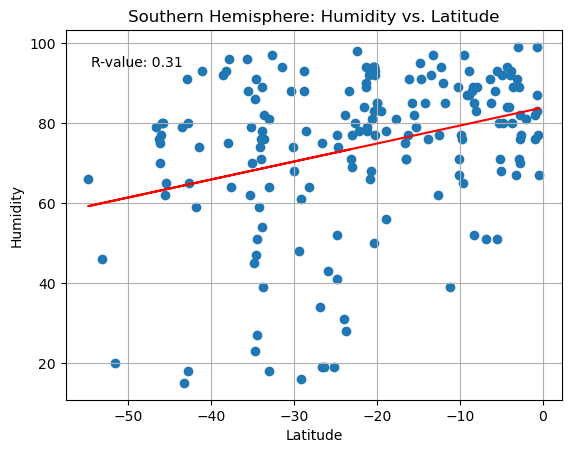

In [88]:
# Linear regression on Southern Hemisphere
southern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])
linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.9), xycoords='axes fraction')


#Display
plt.show()

**Discussion about the linear relationship:** The correlation direction is the same in both hemispheres: The correlation coefficient is positive in both the northern and southern hemisphere, indicating that the relationship between humidity and latitude is similar in both hemispheres. In both hemispheres, humidity tends to increase as latitude increases, but the strength of this relationship is stronger in the northern hemisphere than in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

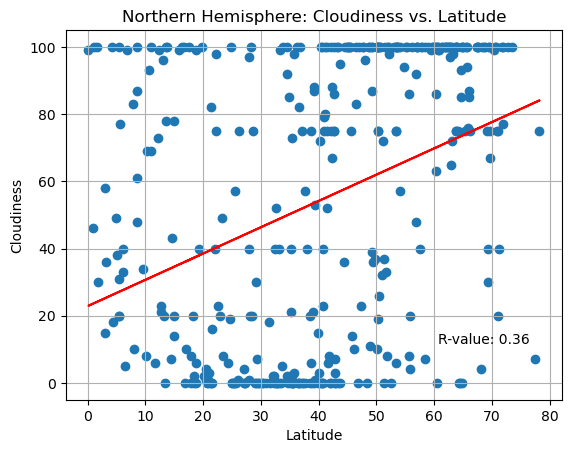

In [100]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])
linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.75, 0.15), xycoords='axes fraction')


#Display
plt.show()

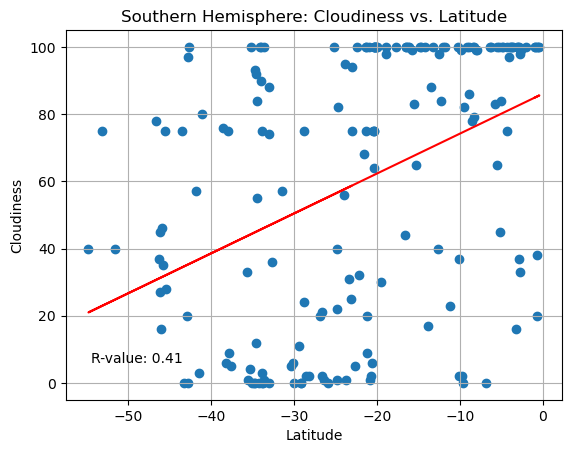

In [73]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
southern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])
linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.10), xycoords='axes fraction')


#Display
plt.show()

**Discussion about the linear relationship:** The correlation direction and strength are similar in both hemispheres: The correlation coefficient is positive in both the northern and southern hemisphere, and the correlation strength is similar in both hemispheres, indicating that the relationship between cloudiness and latitude is similar in both hemispheres. In both hemispheres, cloudiness tends to increase as latitude increases, but the strength of this relationship is not particularly strong in either hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

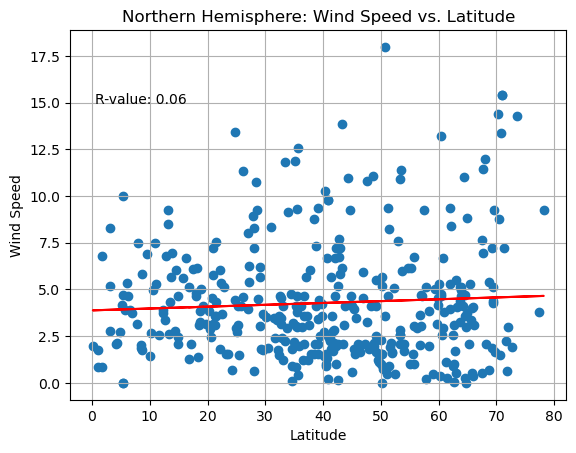

In [82]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])
linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.8), xycoords='axes fraction')


#Display
plt.show()

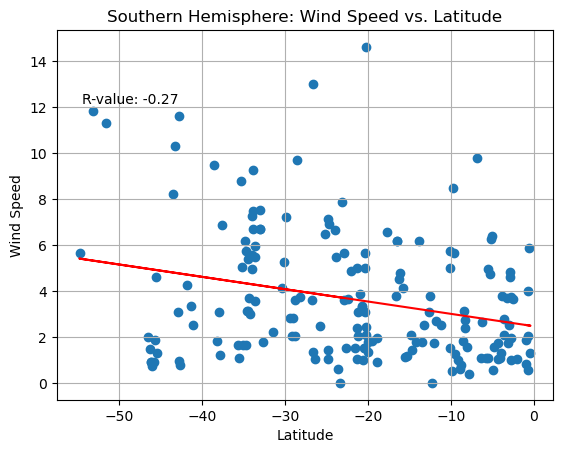

In [81]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
southern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])
linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.grid()

# Annotate the plot with the R-value
plt.annotate(f'R-value: {r_value:.2f}', xy=(0.05, 0.8), xycoords='axes fraction')


#Display
plt.show()

**Discussion about the linear relationship:** An r-value of -0.27 for southern hemisphere for wind speed vs latitude suggests that there is a weak negative correlation between wind speed and latitude in the southern hemisphere. This means that as latitude increases (moving towards the poles), wind speed tends to decrease.The correlation coefficient is positive in the northern hemisphere indicating a different relationship between wind speed and latitude in the two hemispheres.